# **Music Recommendation System**
**REPO VERSION**

# **Milestone 1**

## **Problem Definition**

**The context** - Why is this problem important to solve?<br>
**The objectives** - What is the intended goal?<br>
**The key questions** - What are the key questions that need to be answered?<br>
**The problem formulation** - What is it that we are trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name and the year of release. Second file contains the user id, song id and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

##### **Importing Libraries**

In [2]:
# mount the drive
#from google.colab import drive
#drive.mount('/content/drive')

In [19]:
import warnings # ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np # libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt # library for data visualization

import seaborn as sns # advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity # compute the cosine similarity between two vectors
from collections import defaultdict # dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # performance metrics in sklearn

from sklearn import preprocessing # for embedding encrypted data

##### **Loading Dataset**

In [20]:
# import the datasets
count_df = pd.read_csv('/Users/student/Downloads/count_data.csv')
song_df = pd.read_csv('/Users/student/Downloads/song_data.csv')

In [21]:
# copy data to another dataframe
count_df_copy = count_df.copy(deep=True)
song_df_copy = song_df.copy(deep=True)

In [22]:
song_df.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [6]:
count_df.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [23]:
# drop the column 'Unnamed: 0'  
count_df.drop(['Unnamed: 0'], 
                axis = 1, 
                inplace = True)


In [25]:
count_df.head()

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [26]:
# fill null values in song_df with fillna()
song_df = song_df.fillna(value=0)

In [27]:
# apply label encoding for "song_id"
encoded_song_id =  preprocessing.LabelEncoder()
encoded_song_id.fit(song_df.song_id)
song_df.song_id = encoded_song_id.transform(song_df.song_id)
count_df.song_id = encoded_song_id.transform(count_df.song_id)

# apply label encoding for "user_id"
encoded_user_id =  preprocessing.LabelEncoder()
count_df.user_id = encoded_user_id.fit_transform(count_df.user_id)


In [36]:
# left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously.

merged_df = count_df.merge(song_df.drop_duplicates(['song_id']), 
                            how='left', 
                            on='song_id')

In [101]:
merged_df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,17370,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,45995,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,82002,1,Stronger,Graduation,Kanye West,2007
3,54961,83689,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,129375,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [41]:
merged_df.describe(include = [np.int, np.object_])

,user_id,song_id,play_count,title,release,artist_name,year
count,2.000000e+06,2.000000e+06,2.000000e+06,2000000,2000000,2000000,2.000000e+06
unique,NaN,NaN,NaN,9567,5388,3375,NaN
top,NaN,NaN,NaN,Sehr kosmisch,Greatest Hits,Coldplay,NaN
freq,NaN,NaN,NaN,8277,15692,29422,NaN
mean,3.813599e+04,5.097695e+05,3.045485e+00,NaN,NaN,NaN,1.628645e+03
std,2.204443e+04,2.863777e+05,6.579720e+00,NaN,NaN,NaN,7.787283e+02
min,0.000000e+00,1.900000e+01,1.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,1.911200e+04,2.622680e+05,1.000000e+00,NaN,NaN,NaN,1.984000e+03
50%,3.794900e+04,5.232100e+05,1.000000e+00,NaN,NaN,NaN,2.002000e+03
75%,5.713500e+04,7.603520e+05,3.000000e+00,NaN,NaN,NaN,2.007000e+03


In [100]:
song_df.fillna(value=0)

,song_id,title,release,artist_name,year
0,664054,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,834264,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,286654,No One Could Ever,Butter,Hudson Mohawke,2006
3,66717,Si Vos Querés,De Culo,Yerba Brava,2003
4,324820,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,787007,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,919087,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,318719,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,491369,Faraday,The Trance Collection Vol. 2,Elude,0


In [43]:
# get the column containing the users 
users = merged_df.user_id 
# create dictionary from users to their number of ratings
user_ratings_count = dict()
for user in users:
    # if there is alreay a user, just add 1 to the rating
    if user in user_ratings_count:
        user_ratings_count[user] +=1
        # otherwise set the rating count to 1
    else:
        user_ratings_count[user] = 1


In [44]:
# set a threshold of users' listen counts to at least 90 songs 
RATINGS_CUTOFF = 90
remove_users = []
def ratings_cutoff():
    for user, num_ratings in user_ratings_count.items():
        if num_ratings < RATINGS_CUTOFF:
            remove_users.append(user)
    df_final = merged_df.loc[~merged_df.user_id.isin(remove_users)]

In [46]:
# get the column containing the users
users = merged_df.song_id
# create a dictionary from users to their number of songs
song_ratings_count = dict()
for user in users:
    # if we already have the user, just add 1 to their rating count
    if user in song_ratings_count:
        song_ratings_count[user] += 1
    # otherwise, set their rating count to 1
    else:
        song_ratings_count[user] = 1    

In [47]:
# set a threshold of users' listen counts to at least 120 songs 
RATINGS_CUTOFF = 120
remove_users = []
for user, num_ratings in song_ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df_final= merged_df.loc[~merged_df.song_id.isin(remove_users)]


In [49]:
df_final.head(100)

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,17370,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,45995,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,82002,1,Stronger,Graduation,Kanye West,2007
3,54961,83689,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,129375,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
114,47087,105685,2,Life In Technicolor,Viva La Vida Or Death And All His Friends,Coldplay,2008
115,47087,122206,2,Clocks,A Rush Of Blood To The Head,Coldplay,2002
116,47087,208426,2,Strawberry Swing,Viva La Vida - Prospekt's March Edition,Coldplay,2008
117,47087,341214,4,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008


In [50]:
# drop records with play_count greater than(>) 5

value_counts = df_final['play_count'].value_counts()

# select the values where the count is greater than 5 or equal to 
to_remove = value_counts[value_counts >= 3].index

# save rows where the play_count column is not in to_remove
df_final = df_final[~df_final['play_count'].isin(to_remove)]



In [87]:

df_final.head(100)

,user_id,song_id,play_count,title,release,artist_name,year
7520,70354,678944,247,Waiting For A Dream,Want,Rufus Wainwright,2004
31179,56007,987044,796,Paradise & Dreams,Skydivin',Darren Styles,0
31649,55164,496094,330,Bodies,Sinner,Drowning Pool,2001
55156,49268,466021,311,Reelin' In The Years,The Definitive Collection,Steely Dan,1972
57115,56207,326891,189,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby,Lonnie Gordon,0
...,...,...,...,...,...,...,...
1644896,33537,285630,305,A-Punk (Album),Vampire Weekend,Vampire Weekend,2007
1644901,33537,381578,553,Fast Car (LP Version),Tracy Chapman,Tracy Chapman,1988
1644907,33537,585645,274,Here Without You,Here Without You,3 Doors Down,2002
1644909,33537,633924,676,I'm On A Boat,Incredibad,The Lonely Island / T-Pain,2009


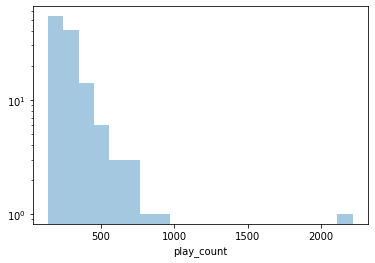

In [122]:
# histogram for play_count in log scale
df_final.fillna(value=0)
play_count_histogram = sns.distplot(df_final.play_count, kde=False, rug=False, bins=20)
play_count_histogram.set_yscale('log')

**Observations**
- The user_id and song_id are unique values. 
- Some users played a song more than once (i.e. 2x, 5x).

##### **Exploratory Data Analysis**

**Shape of the Data**

In [123]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 7520 to 1991617
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      124 non-null    int64 
 1   song_id      124 non-null    int64 
 2   play_count   124 non-null    int64 
 3   title        124 non-null    object
 4   release      124 non-null    object
 5   artist_name  124 non-null    object
 6   year         124 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.8+ KB


In [124]:
# check the data types 
df_final.dtypes

user_id         int64
song_id         int64
play_count      int64
title          object
release        object
artist_name    object
year            int64
dtype: object

In [125]:
# number of unique users 
df_final['user_id'].nunique()

105

**Observations**
- There are a lot of unique values in the count_df dataset. 
- Look into the specifics of the values that are unique. 
- The count_df dataset is very large and has 2,000,000 observations.
- It is difficult computationally to build a model using this dataset and the dataset should be initially reduced. 

In [8]:
# value counts for dataframe count_df
count_df.value_counts()

Unnamed: 0  user_id                                   song_id             play_count
0           b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995  1             1
1333343     e53b230b0c4e035fec86a2a47442fc3db4a98ca5  SOUOSVR12A8C137061  2             1
1333341     e53b230b0c4e035fec86a2a47442fc3db4a98ca5  SOUFPNI12A8C142D19  5             1
1333340     e53b230b0c4e035fec86a2a47442fc3db4a98ca5  SOUAWVS12A6D4F606C  14            1
1333339     e53b230b0c4e035fec86a2a47442fc3db4a98ca5  SOTCLIO12AB0180F26  2             1
                                                                                       ..
666662      810bfc92d58786310e798c1229c701ecae84716e  SORJICW12A8C13640D  3             1
666661      810bfc92d58786310e798c1229c701ecae84716e  SOQJHUW12AB0188A24  6             1
666660      810bfc92d58786310e798c1229c701ecae84716e  SOQGVCS12AF72A078D  9             1
666659      810bfc92d58786310e798c1229c701ecae84716e  SOQARNI12A8C141964  5             1
1999999     d8b

In [9]:
# check for unique values in song_df
song_df.nunique()

song_id        999056
title          702428
release        149288
artist_name     72665
year               90
dtype: int64

**Observations**
- There are many unique values in the song_df. 
- Dropping duplicates will help remedy the excess of unique values. 
- The song_df dataset is also quite large and has 999,056 observations. 

In [10]:
# value counts for dataframe song_df
song_df.value_counts()

song_id             title                                    release                           artist_name               year
SOQNMCD12A8C1383D4  Come On Home                             Franz Ferdinand                   Franz Ferdinand           2004    3
SOEGQML12AF7299C84  California Callin'                       7                                 Enrique Iglesias          2003    3
SOXHYWX12A8C142CE8  Real World                               When The World Comes Down         The All-American Rejects  2008    3
SOEHQBQ12A6D4F9EA9  Before Three                             The Cure                          The Cure                  2004    3
SOZBJBH12A8151BD4E  Fade Together                            You Could Have It So Much Better  Franz Ferdinand           2005    3
                                                                                                                                ..
SOHXKYM12AF72AA2F4  3 Am                                     Deus Ex Machina            

**Observations** 
- At most a song is listened to 3 times.
- At the least a song is listened to 1x.

**Observations**
* There are missing values in the 'year' feature.
* There may be missing values in the consecutive feature (s). 

### **Let us check the data types and and missing values of each column**

**Observations**
- There are 2000000 entries.
- The data contains 4 columns.
- The data types are int64(2), object(2). 
- The dataset count_df uses more memory ~61.0+ MB. 

**Observations**
- There are 1000000 entries. 
- The data contains 5 columns. 
- The data types are int64(1), object(4). 
- The dataset song_df uses less memory ~38.1 MB.


In [14]:
# check for nulls on count_df dataset 
count_df.isnull().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

**Observations**
- There are no nulls in count_df. 

In [15]:
# check for nulls on song_df dataset 
song_df.isnull().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

**Observations**
- There are 15 titles missing from the data. 
- There are 5 releases missing from the data. 

**Observations** 
- There are ~3498 songs that have been listened to ~4%-8% count. 
- There are ~9566 songs that do not have a significant listen count, at ~1% count. 
- The data contains users who have listened to very few songs and vice versa.
- Might be necessary to filter the data so that it contains users who have listened to a sufficient count of songs. 

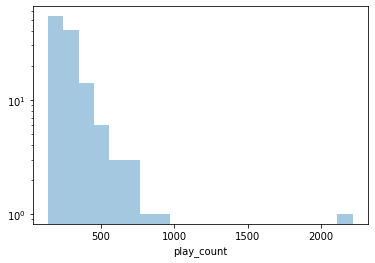

**Observations**
- The data is right skewed, with a few large play_count values that are driving the mean upward. 
- The data should be normalized. 

,user_id,song_id,play_count,title,release,artist_name,year,"(play_count, count)","(play_count, mean)"
83,62305,217352,2213,Starshine,Gorillaz,Gorillaz,2000,148,16.891892
96,28243,439403,879,Call It Off (Album Version),The Con,Tegan And Sara,2007,360,8.744444
1,56007,987044,796,Paradise & Dreams,Skydivin',Darren Styles,0,207,7.710145
16,57320,67669,683,You're The One,If There Was A Way,Dwight Yoakam,1990,6412,8.442920
100,33537,633924,676,I'm On A Boat,Incredibad,The Lonely Island / T-Pain,2009,1153,3.508239
...,...,...,...,...,...,...,...,...,...
80,67973,851645,162,In League With Satan,Works Of Carnage,Krisiun,2003,120,11.308333
45,63698,732287,151,All Right Now,Rock,Free,0,247,3.886640
64,27815,195711,151,Siguiendo La Luna,Chau,Los Fabulosos Cadillacs,1992,338,3.834320
94,66461,541812,142,Black And White,Best Of The IRS Years,The dB's,1981,192,6.015625


**Observations**
- It appears that the maximum play_count is ~247.0 counts. 
- The minimal play_counts is 0. 
- There is a gap between the play_counts, which is visible in the right skewed histogram plot. 
- The data should be normalized. 

##### **Data Reduction**

In [22]:
# get the column containing the users
users = merged_df.user_id
# create a dictionary from users to their number of songs
ratings_count = dict()

# function to filter the data for users who have listened to a good count of songs
def sufficient_count_of_songs(): 
    for user in users:
    # if there already exists a user, just add 1 to the rating count
        if user in ratings_count:
            ratings_count[user] += 1
    # otherwise, set the rating count to 1
        else:
            ratings_count[user] = 1 
    some_ratings_count = list(ratings_count)[:200]
    print(some_ratings_count)
sufficient_count_of_songs()

[1309, 938, 1350, 966, 1072, 533, 1583, 1126, 1110, 1292, 159, 1508, 645, 1428, 486, 1690, 1333, 147, 1198, 1352, 69, 912, 452, 1759, 1154, 454, 297, 1010, 1377, 118, 1187, 1057, 291, 435, 1033, 1697, 1747, 214, 510, 1819, 1509, 10, 585, 474, 1044, 817, 1439, 1271, 283, 790, 1638, 1097, 847, 1173, 1296, 1188, 902, 1099, 1694, 1814, 812, 74, 442, 178, 1174, 1730, 1546, 539, 993, 411, 1402, 11, 1141, 710, 182, 1281, 1737, 217, 886, 1656, 158, 1290, 852, 448, 1060, 50, 918, 637, 1284, 141, 729, 610, 1064, 350, 318, 1142, 1672, 616, 1666, 1251, 1062, 529, 153, 1015, 870, 580, 1274, 1351, 505, 960, 939, 672, 1630, 1403, 96, 1688, 414, 961, 1515, 958, 1109, 395, 1179, 1331, 875, 1625, 1008, 584, 677, 1622, 982, 169, 1782, 1391, 1661, 97, 239, 1584, 278, 936, 233, 1651, 1338, 837, 623, 44, 1648, 255, 161, 1601, 26, 1312, 1580, 1692, 877, 1749, 328, 598, 523, 496, 117, 1822, 754, 1279, 236, 368, 122, 1075, 992, 185, 1668, 1183, 1121, 1605, 1243, 173, 308, 1061, 548, 349, 1778, 1560, 704, 1021,

,user_id,song_id,play_count,title,release,artist_name,year


In [27]:
from IPython.display import display
# function that groups songs by title and play_count with percentage of song counts listened
def group_songs_by_play_count():
    grouped_songs_df = merged_df.groupby(['title']).agg({'play_count': 'count'}).reset_index()
    grouped_songs_sum = grouped_songs_df['play_count'].sum()
    grouped_songs_df['percentage'] = grouped_songs_df['play_count'].div(grouped_songs_sum)*100
    final_grouped_songs_df = grouped_songs_df.sort_values(['play_count', 'title'], ascending = [0,1])
    display(final_grouped_songs_df)
group_songs_by_play_count()

,title,play_count,percentage
1085,Breathe,8,0.08
739,Beautiful,6,0.06
3381,Hold On,5,0.05
3498,Human,5,0.05
437,Angel,4,0.04
...,...,...,...
9562,the Love Song,1,0.01
9563,you were there with me,1,0.01
9564,¡Viva La Gloria! (Album Version),1,0.01
9565,¿Lo Ves? [Piano Y Voz],1,0.01


In [28]:
# Check the shape of the data


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

# Total number of unique user id

In [29]:
# display total number of unique user_id


Total number of unique song id

In [30]:
# display total number of unique song_id


Total number of unique artists

In [31]:
# display total number of unique artists


#### **Observations and Insights:__________**


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

Most interacted users

#### **Observations and Insights:_______**


Songs played in a year

In [32]:
count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)
plt.ylabel('number of titles played') 
# Show the plot
plt.show()

**Observations**
- There are 1000000 entries. 
- The data contains 5 columns. 
- The data types are int64(1), object(4). 
- The dataset song_df uses less memory ~38.1 MB.

**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Proposed approach**
**Potential techniques** - What different techniques should be explored?<br>
**Overall solution design** - What is the potential solution design?<br>
**Measures of success**- What are the key measures of success to compare different potential technqiues?<br>